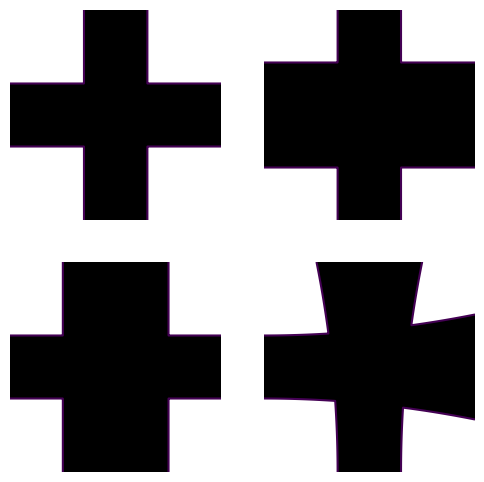

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def hor_beam_sdf(xyz, d1, d2):
    output = np.Inf * np.ones(xyz.shape[0])
    # add x cylinder
    cylinder = np.sqrt(xyz[:,1]**2 + xyz[:,2]**2) - d1
    cylinder = np.abs(xyz[:,1]) - d1
    output = np.minimum(output, cylinder)
    # add y cylinder
    cylinder = np.abs(xyz[:,0]) - d2
    output = np.minimum(output, cylinder)
    return output

X, Y = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))


d1v = [0.3, 0.5, 0.3, 0.3]
d2v = [0.3, 0.3, 0.5, 0.3]
k1 = [0.0, 0.0, 0.0, 0.05]
k2 = [0.0, 0.0, 0.0, 0.05]

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
for ax, d1v, d2v, k1, k2 in zip(axs.flatten(), d1v, d2v, k1, k2):
    r1 = (d1v+(X+1)**2*k1).flatten()
    r2 = (d2v+(Y+1)**2*k2).flatten()

    Z = hor_beam_sdf(np.array([X.flatten(), Y.flatten(), np.zeros(X.size)]).T, r1, r2).reshape(X.shape)


    ax.contourf(X, Y, Z, levels=[-2, 0, 0.00000001], colors=["black", "white"])
    ax.contour(X, Y, Z, levels=[0])
    ax.set_axis_off()